The aim here is to implement Slice Sampling 

However, first we aim to graph a simple illustration of the slice sampling ideology

In [1]:
%matplotlib inline
import numpy as np
import theano.tensor as tt
import pymc3 as pm

import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('notebook')
plt.style.use('seaborn-darkgrid')

WARNING (theano.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
C:\ProgramData\Anaconda3\lib\site-packages\theano\configdefaults.py:560: UserWarning: DeprecationWarning: there is no c++ compiler.This is deprecated and with Theano 0.11 a c++ compiler will be mandatory
  warnings.warn("DeprecationWarning: there is no c++ compiler."
WARNING (theano.configdefaults): g++ not detected ! Theano will be unable to execute optimized C-implementations (for both CPU and GPU) and will default to Python implementations. Performance will be severely degraded. To remove this warning, set Theano flags cxx to an empty string.
WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [4]:
data = np.random.randn(100)
with pm.Model() as model:
    mu = pm.Normal('mu', mu=0, sigma=1)
    sd = pm.HalfNormal('sd', sigma=1)
    obs = pm.Normal('obs', mu=mu, sigma=sd, observed=data)
    step = pm.Slice()
    trace = pm.sample(step = step)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Slice: [sd]
>Slice: [mu]
Sampling 4 chains: 100%|████████████████████████████████████████████████████████| 4000/4000 [01:04<00:00, 61.63draws/s]


In [18]:
with model:
    post_pred = pm.sample_posterior_predictive(trace, samples=5000)

100%|████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:04<00:00, 1225.69it/s]


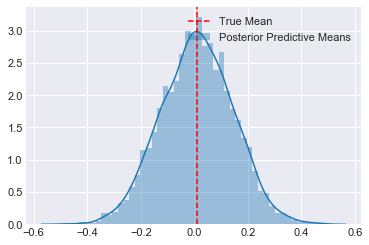

In [20]:
fig, ax = plt.subplots()
sns.distplot(post_pred['obs'].mean(axis=1), label='Posterior Predictive Means', ax=ax)
ax.axvline(data.mean(), ls='--', color='r', label='True Mean')
ax.legend(loc = 1);
fig.savefig('Slice.png')